In [1]:
from sklearn.datasets import fetch_covtype
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [54]:

data = fetch_covtype(as_frame=True)
features = data.data
y= data.target

uX_train, uX_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
print(f"Training data shape: {uX_train.shape}")
print(f"Testing data shape: {uX_test.shape}")


scaler = StandardScaler()
X_train = scaler.fit_transform(uX_train)
X_test= scaler.transform(uX_test)




Training data shape: (464809, 54)
Testing data shape: (116203, 54)


In [ ]:

log_reg = LogisticRegression(max_iter=1000, random_state=42, solver="saga")
log_reg.fit(X_train, y_train)


In [57]:
y_pred = log_reg.predict(X_test)
print('Training accuracy: ', round(log_reg.score(X_train, y_train),2))
print('Testing accuracy: ', round(log_reg.score(X_test, y_test),2))



Training accuracy:  0.72
Testing accuracy:  0.72


In [ ]:
print(y_test.shape)

(116203,)


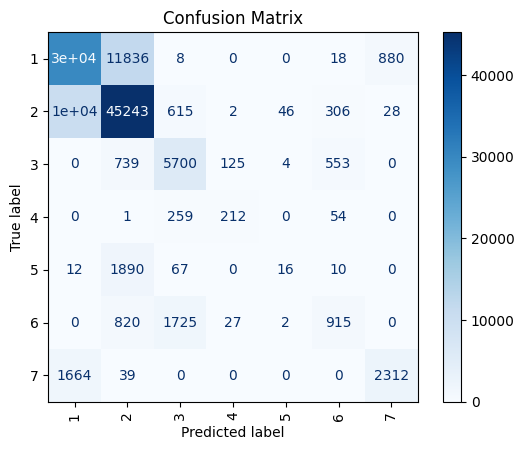

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the test set
y_pred = log_reg.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


Train RMSE:  1.23
Test RMSE:  1.22


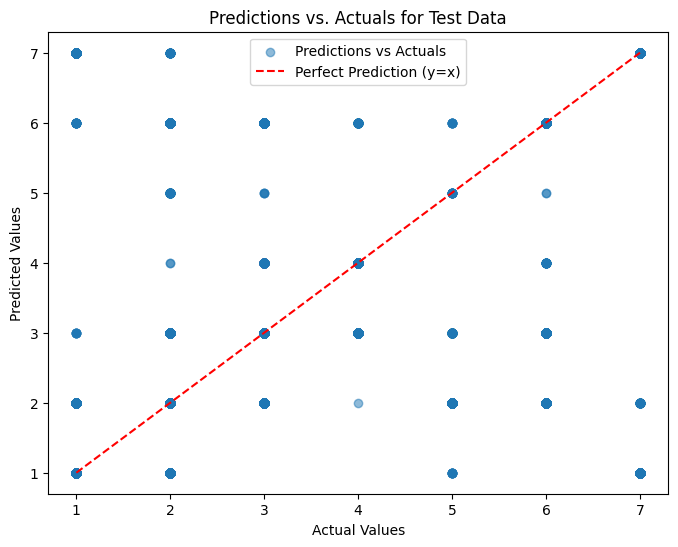

In [16]:
RMSE_train = np.sqrt(mean_squared_error(y_train, log_reg.predict(X_train)))
print('Train RMSE: ', round(RMSE_train,2))
RMSE_test = np.sqrt(mean_squared_error(y_test, log_reg.predict(X_test)))
print('Test RMSE: ', round(RMSE_test,2))

plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred, alpha=0.5, label="Predictions vs Actuals")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Prediction (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. Actuals for Test Data")
plt.legend()
plt.show()

In [12]:

from sklearn.metrics import mean_squared_error
import numpy as np


train_predictions = log_reg.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

# Compute RMSE for the test set
test_predictions = log_reg.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Training RMSE: 1.2251
Test RMSE: 1.2249


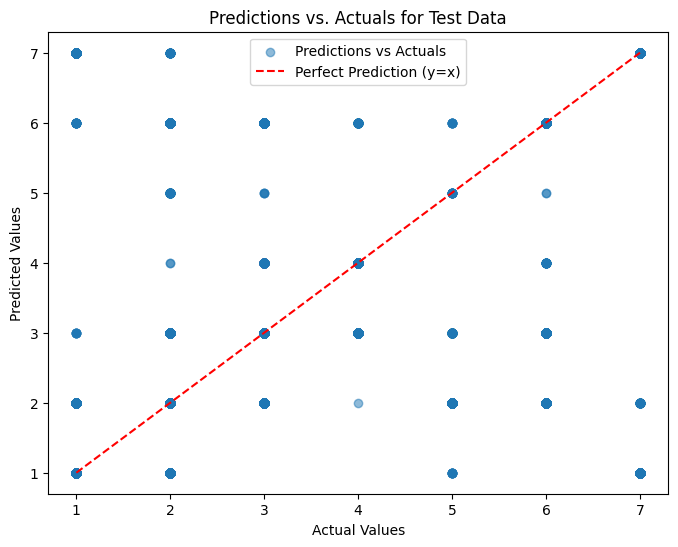

In [13]:
import matplotlib.pyplot as plt

# Scatter plot for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, alpha=0.5, label="Predictions vs Actuals")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Prediction (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. Actuals for Test Data")
plt.legend()
plt.show()


In [9]:
print(X_train.mean(axis=0))
print(X_train.std(axis=0))

[ 2.30624423e-16 -9.27070824e-17  6.64924249e-17 -5.94209332e-16
 -3.68324644e-16 -3.24361332e-17 -1.10597483e-16  6.16002053e-16
  1.24251806e-16  1.12395484e-16 -5.63761673e-16 -1.02896410e-14
  5.90009579e-15 -7.34191581e-15 -1.26326794e-15  5.73896448e-15
 -1.42599060e-14  5.72439231e-15 -3.55750575e-15  6.77393057e-16
  3.56158590e-15 -1.94937844e-15  8.08862546e-16  2.51271353e-16
 -2.70934269e-15 -2.08355029e-15  5.54922016e-15 -1.17063256e-14
 -5.39126399e-15  3.73862323e-15 -2.79767280e-15  5.93056080e-15
  2.63587287e-15 -6.63196271e-15  1.68539830e-15  2.61778020e-15
  6.68872129e-15 -1.05272213e-14  3.56811707e-16  4.10541245e-15
 -1.02513210e-15  3.29801699e-15 -2.88121158e-15 -2.85144382e-15
  3.47029817e-15  4.47383843e-15 -2.78185643e-15  8.15461474e-16
 -9.29415342e-16 -2.44904541e-16  3.57139174e-15  3.10675232e-15
 -2.39458706e-15 -1.23353499e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Train a Logistic Regression model using SGD
sgd_clf = SGDClassifier(
    loss='log_loss',      # Correct loss parameter for logistic regression
    max_iter=1000,        # Number of iterations
    tol=1e-3,             # Convergence tolerance
    random_state=42
)
sgd_clf.fit(X_train, y_train)

# Make predictions and compute accuracy
y_pred = sgd_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"SGD Logistic Regression Test Set Accuracy: {test_accuracy:.4f}")


SGD Logistic Regression Test Set Accuracy: 0.7125


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_clf.predict(X_test)

# Compute test set accuracy
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Output the accuracy
print(f"Decision Tree Test Set Accuracy: {test_accuracy_dt:.4f}")


Decision Tree Test Set Accuracy: 0.9389


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Compute test set accuracy
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Output the accuracy
print(f"Random Forest Test Set Accuracy: {test_accuracy_rf:.4f}")


Random Forest Test Set Accuracy: 0.9552


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest (Ensemble Method)
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)

# Predict and compute accuracy
y_pred_forest = random_forest.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_pred_forest)

print(f"Random Forest Test Accuracy: {forest_accuracy:.4f}")


Random Forest Test Accuracy: 0.9551


In [ ]:
from sklearn.svm import SVC

try:
    # Train SVM
    svm = SVC()
    svm.fit(X_train, y_train)

    # Predict and compute accuracy
    y_pred_svm = svm.predict(X_test)
    svm_accuracy = accuracy_score(y_test, y_pred_svm)

    print(f"SVM Test Accuracy: {svm_accuracy:.4f}")
except Exception as e:
    print(f"Error training SVM: {e}")
